# Building your own Object Detector from scratch

This notebook has educational purposes only.

It shows how to build a simple Object Detector from scratch using Tensorflow & Keras.

The model is trained over the Labeled Mask database.

Check this story on medium for more details: https://medium.com/@doleron/building-your-own-object-detector-from-scratch-bfeadfaddad8

## Getting the data

Before run this notebook, it is necessary to download the archive file with the training images and respective annotation files.

The file is available on Kaggle: https://www.kaggle.com/datasets/techzizou/labeled-mask-dataset-yolo-darknet

Hit the download button and copy the `archive.zip` to the `data` folder. After that, run the next cell.

In [23]:
import pathlib

data_dir = pathlib.Path("Images_Grocery/ShelfImages/")
annot_path = "./grocery_annotations/annotation - kopia.txt"
image_files = list(data_dir.glob('*.jpg'))
print(len(image_files))

353


The previous cell uncompress the `archive.zip` file and store the images & text files in the `data/obj` folder. We can inspect the contents of those files as shown below:  

In [24]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

Images_Grocery\ShelfImages\C1_P11_N1_S5_1.JPG


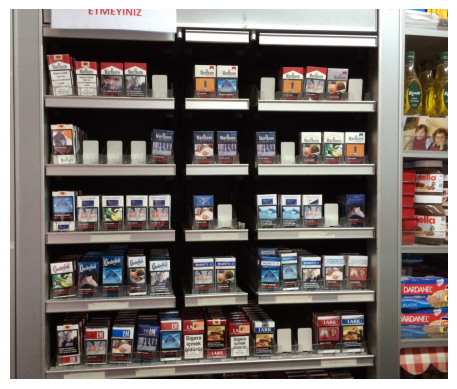

In [25]:
sample_img_path = str(image_files[103])
print(sample_img_path)
sample_img = cv2.imread(sample_img_path, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Basically, the data consist of images files and respective annotation files. Each annotation file has one or more lines in which we can find the class and bounding box coordinates:

In [26]:
img_path ="./Images_Grocery/ShelfImages"
annot_path = "./grocery_annotations/annotation - kopia.txt"

In [27]:
annot=[]
# Öppna filen och läs varje rad
with open(annot_path, 'r') as file:
    for i, line in enumerate(file):
        if i >= 30:
            break
        # Dela upp varje rad med mellanslag
        parts = line.split(' ')

       # Första delen är en sträng, resten är heltal
        row = [parts[0]] + [int(num) for num in parts[1:]]
        # Lägg till raden i matrisen
        annot.append(row)

In [28]:
sample_annotation_path = sample_img_path[0:-4] + ".JPG" +'.txt'
with open(sample_annotation_path) as f:
    print(f.readlines())

['1124 2044 168 276 0\n', '1168 776 192 256 0\n', '1172 352 192 244 0\n', '1200 1216 168 248 0\n', '1200 1628 168 252 0\n', '1276 2040 168 276 0\n', '1356 344 192 244 0\n', '1356 776 192 256 0\n', '1360 1620 168 252 0\n', '1432 2048 168 276 0\n', '1592 2024 168 276 0\n', '1608 796 168 236 0\n', '1644 1616 168 252 0\n', '1768 1600 168 272 0\n', '1896 792 168 236 0\n', '1908 1624 156 240 0\n', '1912 1208 168 248 0\n', '2052 772 168 236 0\n', '2072 1624 156 240 0\n', '2076 360 192 244 0\n', '2164 1992 168 276 0\n', '2204 788 168 236 0\n', '2212 1204 168 248 0\n', '2220 1616 156 240 0\n', '260 1180 168 292 0\n', '260 736 192 288 0\n', '268 1656 168 248 0\n', '300 2064 168 284 0\n', '428 1660 168 248 0\n', '476 2076 168 284 0\n', '596 1620 168 268 0\n', '668 2064 168 284 0\n', '760 1612 168 280 0\n', '828 2060 168 276 0\n', '904 764 192 256 0\n', '912 1636 168 252 0\n', '984 2048 168 276 0\n', '1776 360 192 244 1\n', '1916 368 192 244 1\n', '236 284 196 308 1\n', '412 332 192 244 1\n', '572

Image shape: (2448, 2308, 3)
Image data type: uint8


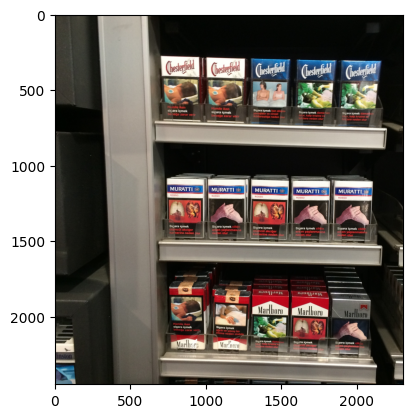

In [29]:
image_name ="C1_P01_N1_S3_1.JPG"
img = cv2.imread(os.path.join(img_path, image_name))

# Check if the image is loaded successfully
if img is not None:
    # Print image details
    print(f"Image shape: {img.shape}")
    print(f"Image data type: {img.dtype}")

    # Konvertera färgkanalerna från BGR till RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print(f"Error: Unable to load the image {image_name}")

Processing row for C1_P01_N1_S3_1.JPG. Number of columns: 77. Number of produkts in img 15


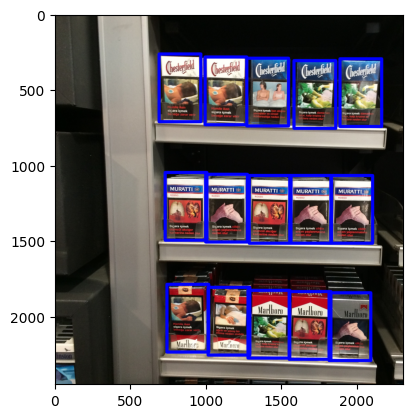

In [30]:
# sample annotation and image boxes
annot=[]
# Öppna filen och läs varje rad
with open(annot_path, 'r') as file:
    for i, line in enumerate(file):
        # Dela upp varje rad med mellanslag
        parts = line.split(' ')

       # Första delen är en sträng, resten är heltal
        row = [parts[0]] + [int(num) for num in parts[1:]]
        # Lägg till raden i matrisen
        annot.append(row)


# Convert the list of lists to a NumPy array
#annot = np.array(annot_list)     

# # Visa den inlästa matrisen
# for row in annot:
#     print(row)


color = (255, 0, 0)
thickness = 20

# Draw rectangles on the image based on the annotations
for i in range(0, len(annot)):
    if (image_name== annot[i][0]):
        num_columns = len(annot[i][:])
        print(f"Processing row for {image_name}. Number of columns: {num_columns}. Number of produkts in img {annot[i][1]}")
        
        for r in range(2,len(annot[i]),5):
            x = int(annot[i][r])
            y = int(annot[i][r+1])
            w = int(annot[i][r+2])
            h = int(annot[i][r+3])
            b =int(annot[i][r+4])
            img = cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness)
        break
            

# Display the image with rectangles
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

The following function filter the files, generating 3 lists:

- training files (70% of images)
- validation files (20% of images)
- test files (last 10%)

In [31]:
# Divide the annotation file into multiple .txt files for each image
# Define the paths
annotation_path = "./grocery_annotations/annotation.txt"
image_dir = "./Images_Grocery/ShelfImages/"

# Open the annotation file
with open(annotation_path, 'r') as f:
    lines = f.readlines()

# Process each line
for line in lines:
    parts = line.split()
    image_name = parts[0]
    num_objects = int(parts[1])
    objects = [parts[i:i+5] for i in range(2, len(parts), 5)]

    # Create a new annotation file for this image
    with open(os.path.join(image_dir, image_name + '.txt'), 'w') as f:
        for obj in objects:
            # Write the object annotation to the file
            f.write(' '.join(obj) + '\n')

In [32]:
from sklearn.model_selection import train_test_split

def list_files(full_data_path = "./Images_Grocery/ShelfImages/", image_ext = '.JPG', test_size = 0.15, validation_size = 0.15):

    files = []

    for r, d, f in os.walk(full_data_path):
        for file in f:
            if file.endswith(image_ext):
                files.append(file)

    # Split the data into training and testing
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

    # Split the training data into training and validation
    train_files, val_files = train_test_split(train_files, test_size=validation_size, random_state=42)

    return train_files, val_files, test_files

In [33]:
training_files, validation_files, test_files = list_files()

print(str(len(training_files)) + " training files")
print(str(len(validation_files)) + " validation files")
print(str(len(test_files)) + " test files")

255 training files
45 validation files
53 test files


This is actually a small dataset. We have only 904 images to train our model!

Let's combine image and annotations in order to check if we actually understand how to deal with the data.

In addition, let's format the images for the input size of our model (244 x 244)

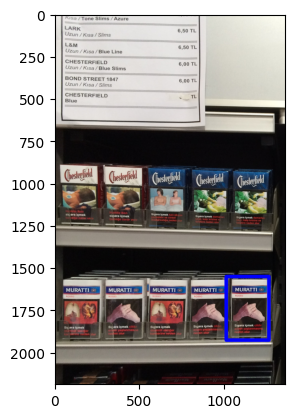

In [34]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the image
image = Image.open('./Images_Grocery/ShelfImages/C1_P01_N1_S2_1.jpg')
img = cv2.imread('./Images_Grocery/ShelfImages/C1_P01_N1_S2_1.jpg')
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Create a draw object
#draw = ImageDraw.Draw(image)

# Define the coordinates and size of the rectangle
x, y, w, h = 1010, 1552, 252, 376

# Draw the rectangle
img = cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

The dataset is composed by different images of peoplse using or not masks. Let's create a tensorflow dataset with the images:

In [35]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # disabling verbose tf logging

# uncomment the following line if you want to force CPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
print(tf.__version__)

2.15.0


In [133]:
input_size = 244
new_size = (244, 244)  # New size (height, width)

def resize_image_and_box(img, box):
    # Calculate the scale factors
    y_scale = input_size / img.shape[0]
    x_scale = input_size / img.shape[1]

    # Resize the image
    resized_img = cv2.resize(img, new_size)

    x, y, w, h = box[0], box[1], box[2], box[3]
    new_box = [int(x / r), int(y / r), int(w / r), int(h / r)]
    
    # Scale the bounding box coordinates
    resized_box = [int(box[0] * x_scale), int(box[1] * y_scale), int(box[2] * x_scale), int(box[3] * y_scale)]

    return resized_img, resized_box

# Usage

#resized_img, resized_box = resize_image_and_box(temp_img, temp_box, new_size)

def format_image(img1, box1):
    img = img1.copy()
    box = box1.copy()
    height, width = img.shape
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv2.resize(img, new_size, interpolation= cv2.INTER_AREA)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized

    x, y, w, h = box[0], box[1], box[2], box[3]
    new_box = [int(x / r), int(y / r), int(w / r), int(h / r)]
    
    return new_image, new_box

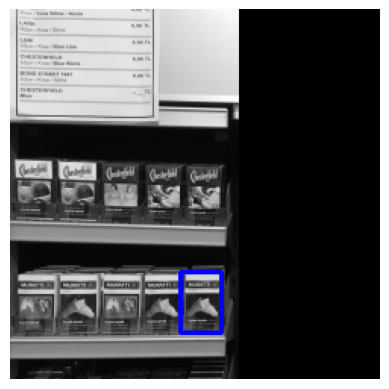

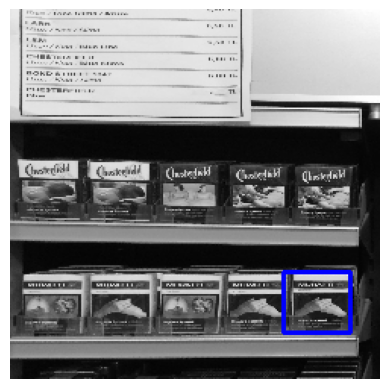

In [134]:
temp_img = cv2.imread('./Images_Grocery/ShelfImages/C1_P01_N1_S2_1.jpg', cv2.IMREAD_GRAYSCALE)
temp_box = [1008, 1552, 252, 376]

temp_img_formated, box = format_image(temp_img, temp_box)

temp_color_img = cv2.cvtColor(temp_img_formated, cv2.COLOR_GRAY2RGB)

cv2.rectangle(temp_color_img, box, (0, 0, 255), 2)

plt.imshow(temp_color_img)
plt.axis("off")
plt.show()

temp_img = cv2.imread('./Images_Grocery/ShelfImages/C1_P01_N1_S2_1.jpg', cv2.IMREAD_GRAYSCALE)
temp_box = [1008, 1552, 252, 376]

temp_img_formated, box = resize_image_and_box(temp_img, temp_box)

temp_color_img = cv2.cvtColor(temp_img_formated, cv2.COLOR_GRAY2RGB)

cv2.rectangle(temp_color_img, box, (0, 0, 255), 2)

plt.imshow(temp_color_img)
plt.axis("off")
plt.show()


In [89]:
def data_load(files, full_data_path = "./Images_Grocery/ShelfImages/", image_ext = ".JPG"):
    X = []
    Y = []

    for file in files:
        # Load the image in grayscale
        img = cv2.imread(os.path.join(full_data_path, file), cv2.IMREAD_GRAYSCALE)

        # Resize the image to have a fixed size (e.g., 224x224)
        #img = cv2.resize(img, (224, 224))

        # Initialize the label as 1
        k = 1
        #img = img.astype(float) / 255.
        # Open the corresponding annotation file
        with open(os.path.join(full_data_path, file + ".txt"), 'r') as fp:
            lines = fp.readlines()
            boxes = []
            for line in lines:
                # If the first character of the line is '0', set the label as 0
                #if line[0] == '0':
                #    k = 0
                parts = line.split()
                # Get the bounding box coordinates from the rest of the line
                box = np.array(parts[:4], dtype=float)
                #boxes.append(box)
                k = int(parts[4])
                copy_img, box = resize_image_and_box(img, box)
                copy_img = copy_img.astype(float) / 255.
                box = np.asarray(box, dtype=float) / input_size
                label = np.append(box, k)
                
                # Normalize the image and bounding box coordinates
                #box = np.asarray(box, dtype=float) / img.shape[0]
                #boxes = [np.asarray(box, dtype=float) / img.shape[0] for box in boxes]

                # Append the label to the bounding box coordinates
                #labels = [np.append(box, k) for box in boxes]

                # Append the image and labels to the lists
                X.append(copy_img)
                Y.append(label)

    # Convert the lists to tensors
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Y = tf.ragged.constant(Y, dtype=tf.float32)

    # Create a TensorFlow dataset from the tensors
    result = tf.data.Dataset.from_tensor_slices((X, Y))

    return result

In [90]:
raw_train_ds = data_load(training_files)

In [91]:
raw_validation_ds = data_load(validation_files)

In [92]:
raw_test_ds = data_load(test_files)

The training, validation & test datasets must be set up in order to follow the tensorflow guideline (https://www.tensorflow.org/datasets/performances):

In [93]:
CLASSES = 10

def format_instance(image, label):
    return image, (tf.one_hot(int(label[4]), CLASSES), [label[0], label[1], label[2], label[3]])

In [94]:
BATCH_SIZE = 32

# see https://www.tensorflow.org/guide/data_performance

def tune_training_ds(dataset):
    dataset = dataset.map(format_instance, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(1024, reshuffle_each_iteration=True)
    dataset = dataset.repeat() # The dataset be repeated indefinitely.
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [95]:
train_ds = tune_training_ds(raw_train_ds)

In [96]:
def tune_validation_ds(dataset):
    dataset = dataset.map(format_instance, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(len(validation_files) // 4)
    dataset = dataset.repeat()
    return dataset

In [97]:
validation_ds = tune_validation_ds(raw_validation_ds)

Let's inspect our training dataset:

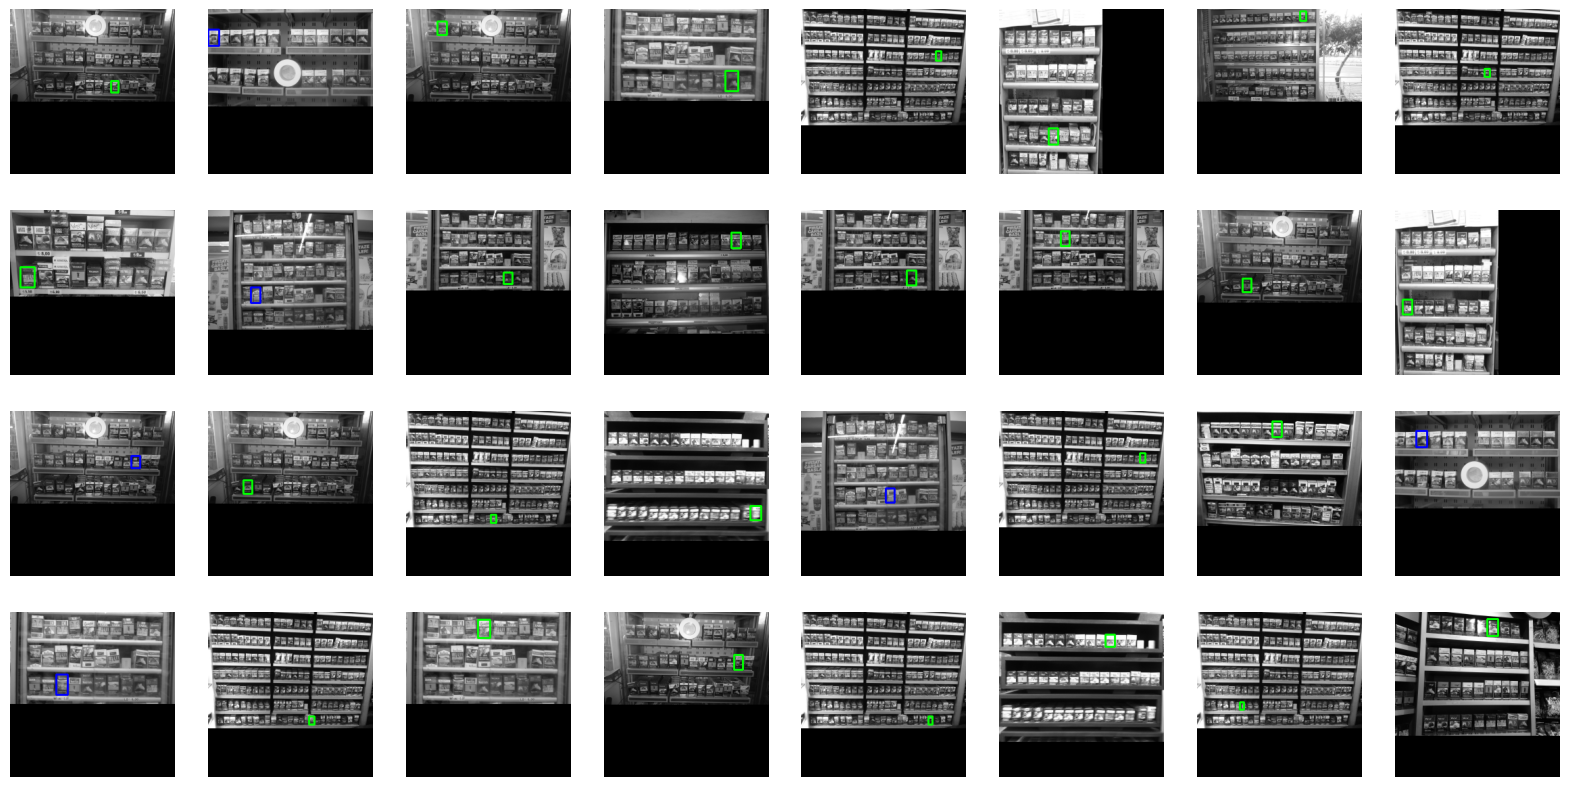

In [98]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4, BATCH_SIZE//4, i + 1)
        label = labels[0][i]
        box = (labels[1][i] * input_size)
        box = tf.cast(box, tf.int32)
        #print(box)
        image = images[i].numpy().astype("float") * 255.0
        image = image.astype(np.uint8)
        image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        color = (0, 0, 255)
        if label[0] > 0:
            color = (0, 255, 0)

        cv2.rectangle(image_color, box.numpy(), color, 2)

        plt.imshow(image_color)
        plt.axis("off")

Based on the image above, we can realize that the training dataset is correctly set. Blue rectangles represent bounding box of **unmask people**. A green rectangle represent a masked person.

Once the data is ready, we can start our modelling and training.

## The model

Since we are building a object detector, our model have two heads: one to classify the object type (or label or class) and other head to output the object bounding box. In order to achieve that, we use Tensorflow Funcional API, as follows:

In [99]:
DROPOUT_FACTOR = 0.5

def build_feature_extractor(inputs):

    x = tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 1))(inputs)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(DROPOUT_FACTOR)(x)
    x = tf.keras.layers.AveragePooling2D(2,2)(x)

    return x

def build_model_adaptor(inputs):
  x = tf.keras.layers.Flatten()(inputs)
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  return x

def build_classifier_head(inputs):
  return tf.keras.layers.Dense(CLASSES, activation='softmax', name = 'classifier_head')(inputs)

def build_regressor_head(inputs):
    return tf.keras.layers.Dense(units = '4', name = 'regressor_head')(inputs)

def build_model(inputs):

    feature_extractor = build_feature_extractor(inputs)

    model_adaptor = build_model_adaptor(feature_extractor)

    classification_head = build_classifier_head(model_adaptor)

    regressor_head = build_regressor_head(model_adaptor)

    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = {'classifier_head' : 'categorical_crossentropy', 'regressor_head' : 'mse' },
              metrics = {'classifier_head' : 'accuracy', 'regressor_head' : 'mse' })

    return model

It is notewhortly that each network head has a specific set of loss function and metrics:

In [100]:
model = build_model(tf.keras.layers.Input(shape=(input_size, input_size, 1,)))

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 244, 244, 1)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 242, 242, 16)         160       ['input_2[0][0]']             
                                                                                                  
 average_pooling2d_3 (Avera  (None, 121, 121, 16)         0         ['conv2d_3[0][0]']            
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_4 (Conv2D)           (None, 119, 119, 32)         4640      ['average_pooling2d_3[0]

Since we have few data, we must keep the model small. The model can be vizualized below:

In [101]:
# plot_model requires graphviz & pydot
# see https://github.com/XifengGuo/CapsNet-Keras/issues/7#issuecomment-370745440
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model training

Our model is all set and we can start the training, as shown in the next cell:

In [116]:
EPOCHS = 20

history = model.fit(train_ds,
                    steps_per_epoch=(len(training_files) // BATCH_SIZE),
                    validation_data=validation_ds, validation_steps=1,
                    epochs=EPOCHS,
                    verbose=0)


The training performance can be checked in the charts below.

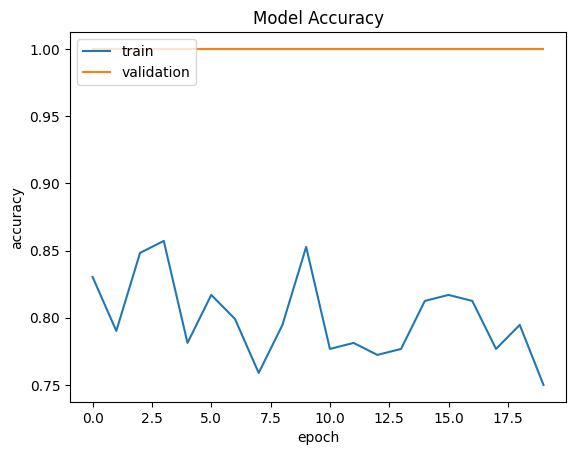

In [117]:
plt.plot(history.history['classifier_head_accuracy'])
plt.plot(history.history['val_classifier_head_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

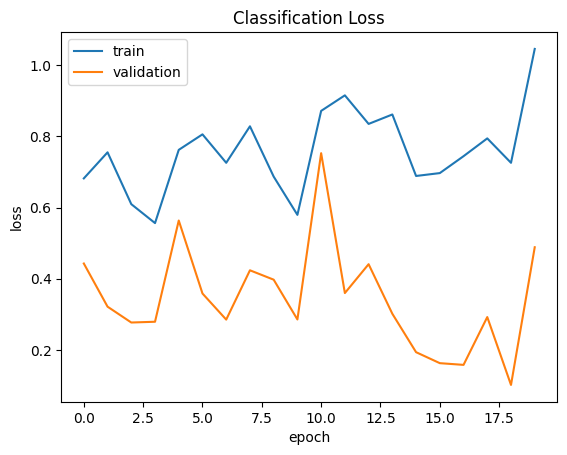

In [118]:
plt.plot(history.history['classifier_head_loss'])
plt.plot(history.history['val_classifier_head_loss'])
plt.title('Classification Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

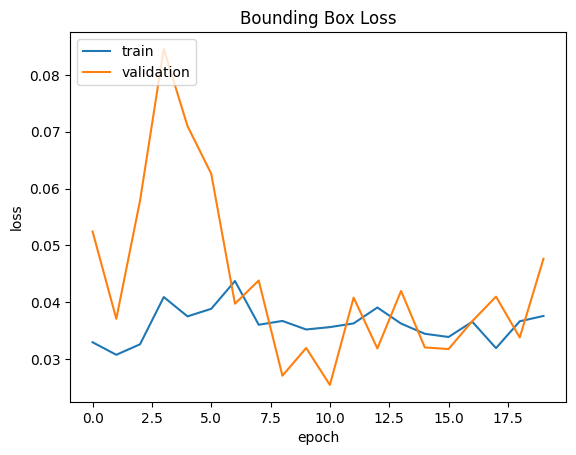

In [119]:
plt.plot(history.history['regressor_head_loss'])
plt.plot(history.history['val_regressor_head_loss'])
plt.title('Bounding Box Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluation

The best way to evaluate the end model performance is by using IoU - intersection over Union - metrics. The following implementation of IoU was adapted from PyImage Search website:

In [81]:
# adapted from: https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def intersection_over_union(boxA, boxB):
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
	yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	boxAArea = (boxA[2] + 1) * (boxA[3] + 1)
	boxBArea = (boxB[2] + 1) * (boxB[3] + 1)
	iou = interArea / float(boxAArea + boxBArea - interArea)
	return iou

In [120]:
def tune_test_ds(dataset):
    dataset = dataset.map(format_instance, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(1)
    dataset = dataset.repeat()
    return dataset

test_ds = tune_test_ds(raw_test_ds)

The model performance is finally evaluated on the test dataset. Green boxes indicaates correct classification in which the predicted label (masked-unmasked) matches with the actual label.
A red box indicate a wrong classification.

20


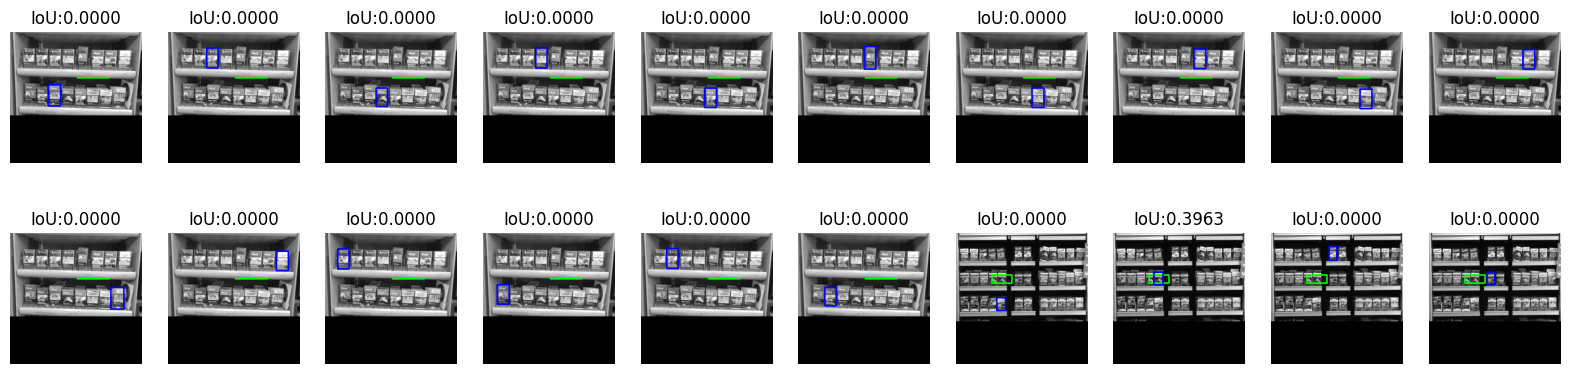

In [121]:
plt.figure(figsize=(20, 10))

test_list = list(test_ds.take(20).as_numpy_iterator())

print(len(test_list))

image, labels = test_list[0]

for i in range(len(test_list)):

    ax = plt.subplot(4, 10, i + 1)
    image, labels = test_list[i]

    predictions = model(image)

    predicted_box = predictions[1][0] * input_size
    predicted_box = tf.cast(predicted_box, tf.int32)

    predicted_label = predictions[0][0]

    image = image[0]

    actual_label = labels[0][0]
    actual_box = labels[1][0] * input_size
    actual_box = tf.cast(actual_box, tf.int32)

    image = image.astype("float") * 255.0
    image = image.astype(np.uint8)
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    color = (255, 0, 0)
    # print box red if predicted and actual label do not match
    if (predicted_label[0] > 0.5 and actual_label[0] > 0) or (predicted_label[0] < 0.5 and actual_label[0] == 0):
        color = (0, 255, 0)

    cv2.rectangle(image_color, predicted_box.numpy(), color, 2)
    cv2.rectangle(image_color, actual_box.numpy(), (0, 0, 255), 2)

    IoU = intersection_over_union(predicted_box.numpy(), actual_box.numpy())

    plt.title("IoU:" + format(IoU, '.4f'))
    plt.imshow(image_color)
    plt.axis("off")

## Conclusion

Taking in consideration the small size of the data used for training and the fact of training the model from scratch without transfer learning, the results above are surprisingly good. We can think in ways to improve it even more:

- The first option to improve the bound box and classificataion performance is increase the training data size which can be easily achieved by data augmentation.

- Tweaking the hyperparameters and finding on way to improve the regularization can either improve the results, reducing the classification and regression errors.

A good enhacement here would be calculating mAP comparing the results to one or more object detectors. Implementing other features like multiscale and multiple detections can also provide a solid understand of real challengings in developing an battle-tested object detector.